<div style="width: 90%; height: 100px; background-color: #ffffff; border: 3px solid #d62d20; text-align: center; line-height: 100px; color: #0057e7; font-size: 24px; font-weight: bold; border-radius:6px;">
    📉 Google Stock Prediction usnig LSTM 📈
</div>

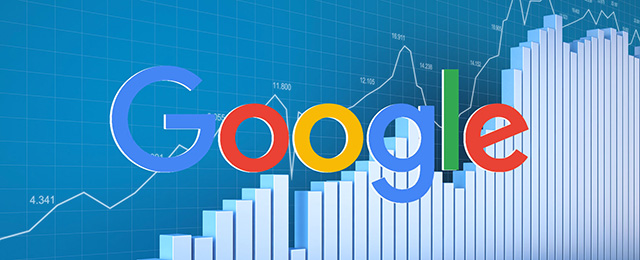

<div style="width: 90%; background-color: #ffffff; color: #ffffff; padding: 20px; border: 3px solid #d62d20; margin-bottom: 20px;border-radius:10px;">
    <h3 style="color: #008744;">Introduction</h3>
    <span style="color: #0057e7;">
        Welcome to this notebook where we'll dive into predicting Google stock prices using LSTM. In this project, we'll leverage the power of deep learning to forecast stock prices based on historical data.
        <br>
         <br>
        Created By : AmirHossein Mirzaei | September 2023
    </span> 
    <h3 style="color: #008744;">Tasks in this project</h3>
    <ul style="list-style-type: none; padding-left: 0; color: #0057e7;">
        <li><span style="color: #003366;">&#8226;</span> Importing necessary libraries</li>
        <li><span style="color: #003366;">&#8226;</span> Loading and preparing the dataset</li>
        <li><span style="color: #003366;">&#8226;</span> Data preprocessing and normalization</li>
        <li><span style="color: #003366;">&#8226;</span> Generating sequences for training</li>
        <li><span style="color: #003366;">&#8226;</span> Constructing the LSTM model architecture</li>
        <li><span style="color: #003366;">&#8226;</span> Compiling and training the model</li>
        <li><span style="color: #003366;">&#8226;</span> Visualizing predictions on training data</li>
        <li><span style="color: #003366;">&#8226;</span> Predicting stock prices for the next 10 days</li>
    </ul>
</div>


## <span style="color: #d62d20;">Importing necessary libraries</span>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pi
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

In [2]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

## <span style="color: #d62d20">Load Stock Data</span>

Load the stock data from the provided CSV file

In [5]:
stock_data = pd.read_csv(r"C:\Users\Lenovo\Downloads\Study material\AI\Recurrent Neural Network - LSTM and GRU\Assignment\Recurrent Neural network-LSTMs and GRUs\GOOG.csv")

In [6]:
stock_data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


## <span style="color: #d62d20">Data Ovreview</span>

In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [ ]:
stock_data.describe().T

In [ ]:
stock_data.isna().sum()

## <span style="color: #d62d20">Data Visualization</span>


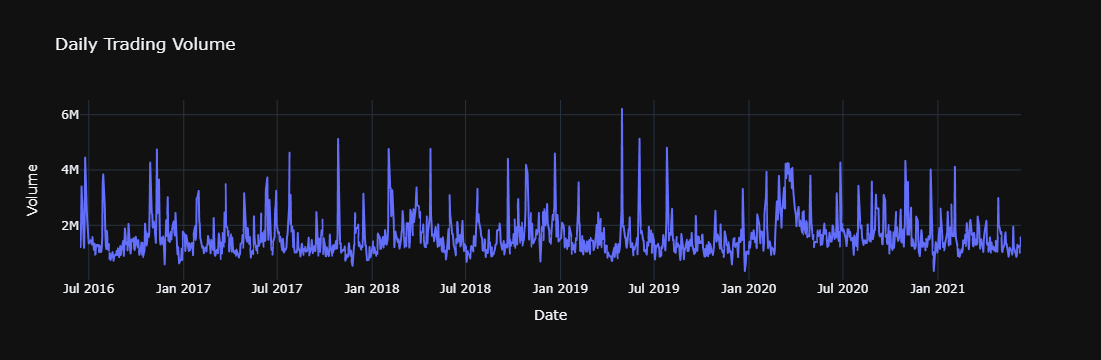

In [7]:
fig = px.line(stock_data, x='date', y='volume', title='Daily Trading Volume')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Volume')
fig.update_layout(template='plotly_dark')
fig.show()

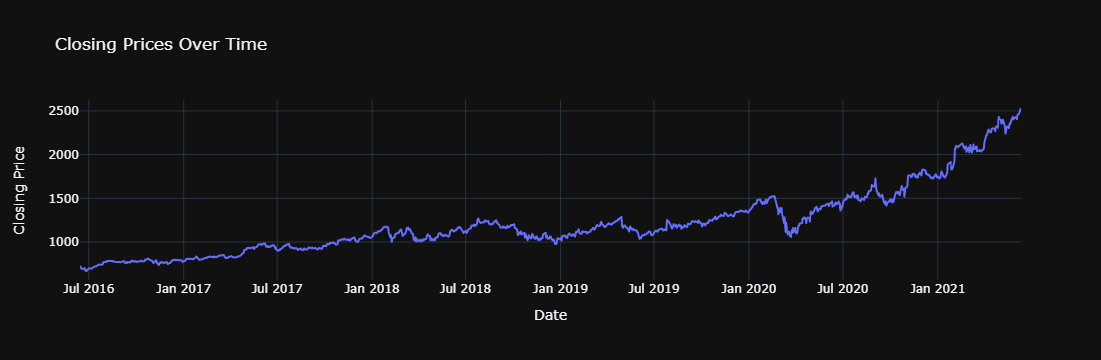

In [8]:
fig = px.line(stock_data, x='date', y='close', title='Closing Prices Over Time')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Closing Price')
fig.update_layout(template='plotly_dark')
fig.show()

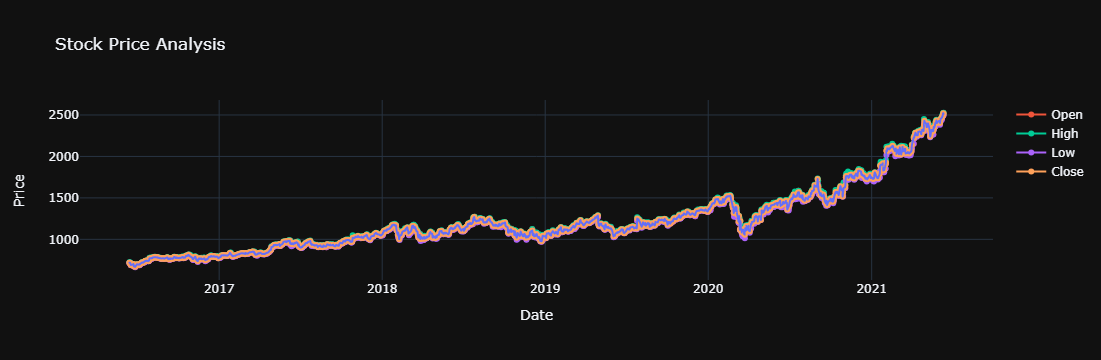

In [9]:
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['open'], mode='lines+markers', name='Open'))
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['high'], mode='lines+markers', name='High'))
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['low'], mode='lines+markers', name='Low'))
fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['close'], mode='lines+markers', name='Close'))

fig.update_layout(title='Stock Price Analysis',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

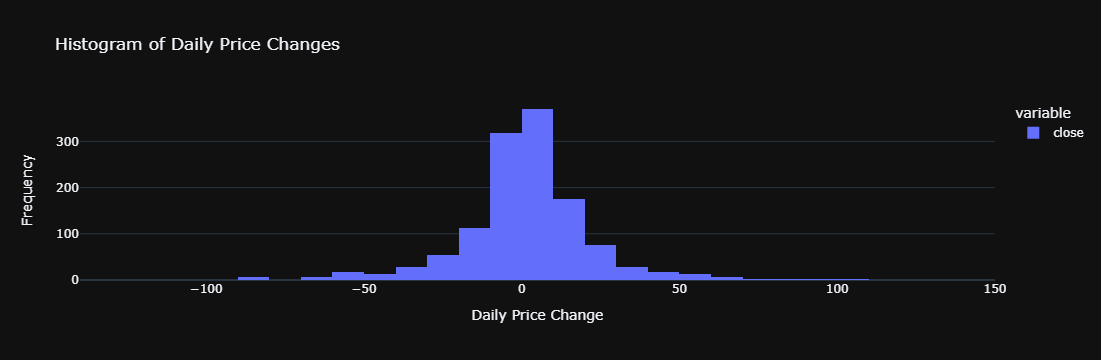

In [11]:
daily_changes = stock_data['close'].diff()
fig = px.histogram(daily_changes, nbins=50, title='Histogram of Daily Price Changes')
fig.update_xaxes(title='Daily Price Change')
fig.update_yaxes(title='Frequency')
fig.update_layout(template='plotly_dark')
fig.show()

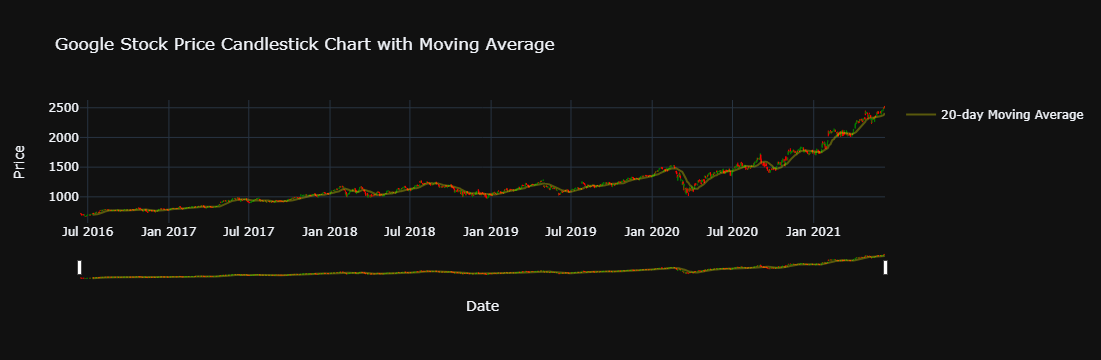

In [12]:
stock_data['20-day MA'] = stock_data['close'].rolling(window=20).mean()

fig = go.Figure(data=[go.Candlestick(
    x=stock_data['date'],
    open=stock_data['open'],
    high=stock_data['high'],
    low=stock_data['low'],
    close=stock_data['close'],
    name="Candlesticks",
    increasing_line_color='green',
    decreasing_line_color='red',
    line=dict(width=1),
    showlegend=False
)])

fig.add_trace(go.Scatter(x=stock_data['date'], y=stock_data['20-day MA'], mode='lines', name='20-day Moving Average', line=dict(color='rgba(255, 255, 0, 0.3)')))

fig.update_layout(
    title="Google Stock Price Candlestick Chart with Moving Average",
    xaxis_title="Date",
    yaxis_title="Price",
    template="plotly_dark",
)

fig.show()

In [ ]:
stock_data = stock_data.drop('20-day MA', axis=1)

## <span style="color: #d62d20">Data Preprocessing</span>

<span style="color: blue">1.</span> Convert the 'date' column in the stock data to datetime format using `pd.to_datetime`.
<br>
<span style="color: blue">2.</span> Sort the stock data by date in ascending order using `sort_values`.
<br>
<span style="color: blue">3.</span> Create a new DataFrame 'stock' containing the selected columns (`date`, `close`, `high`, `low`, `open`, `volume`) for further analysis.


In [16]:
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data = stock_data.sort_values('date')

In [18]:
stock_data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [19]:
stock = stock_data[['date', 'close', 'high', 'low', 'open', 'volume']]

## <span style="color: #d62d20">Data Normalization</span>

<span style="color: blue">1.</span> Initialize a Min-Max Scaler using `MinMaxScaler()`.
<br>
<span style="color: blue">2.</span> Create a copy of the 'stock' DataFrame containing columns ('open', 'high', 'low', 'volume', 'close').
<br>
<span style="color: blue">3.</span> Use the scaler to fit and transform the data, performing Min-Max normalization.


In [20]:
scaler = MinMaxScaler()
normalized_data = stock[['open', 'high', 'low', 'volume', 'close']].copy()
normalized_data = scaler.fit_transform(normalized_data)

In [21]:
normalized_data

array([[0.0245318 , 0.02705034, 0.02715849, 0.16369747, 0.02698372],
       [0.02589108, 0.02732532, 0.02944187, 0.14807567, 0.02733443],
       [0.02368495, 0.02391235, 0.02178521, 0.27911971, 0.02271575],
       ...,
       [0.98628851, 0.98814357, 0.99402727, 0.11255173, 0.98370509],
       [0.98332722, 0.99798888, 0.99766213, 0.20732478, 1.        ],
       [1.        , 1.        , 1.        , 0.15623092, 0.99586153]])

## <span style="color: #d62d20">Data Splitting</span>

<span style="color: blue">1.</span> Split the normalized data into training and testing sets using `train_test_split`. The testing set size is set to 20% of the data, and `shuffle` is set to `False` to maintain the chronological order.

<span style="color: blue">2.</span> Create a DataFrame 'train_df' containing the training data with columns (`date`, `close`, `high`, `low`, `open`, `volume`).

<span style="color: blue">3.</span> Create a DataFrame 'test_df' containing the testing data with columns (`date`, `close`, `high`, `low`, `open`, `volume`).


In [22]:
train_data, test_data = train_test_split(normalized_data, test_size=0.2, shuffle=False)

In [23]:
train_df = pd.DataFrame(train_data, columns=['open', 'high', 'low', 'volume', 'close'])
test_df = pd.DataFrame(test_data, columns=['open', 'high', 'low', 'volume', 'close'])

## <span style="color: #d62d20">Sequence Generation</span>

<span style="color: blue">1.</span> Define a function named `generate_sequences` that takes a DataFrame `df` and an optional parameter `seq_length` (default is 50).

<span style="color: blue">2.</span> Extract the relevant columns ('open', 'high', 'low', 'volume', 'close') from the DataFrame `df` and reset the index.

<span style="color: blue">3.</span> Initialize empty lists `sequences` and `labels` to store the sequences and labels for training.

<span style="color: blue">4.</span> Iterate through the data using a sliding window approach. For each index, append the next `seq_length` rows as a sequence and the corresponding last row as the label.

<span style="color: blue">5.</span> Convert the lists of sequences and labels into NumPy arrays.

<span style="color: blue">6.</span> Return the generated sequences and labels.

Then we generate sequences and labels for training data using `generate_sequences` function on 'train_df' DataFrame.

And next, we generate sequences and labels for testing data using `generate_sequences` function on 'test_df' DataFrame.


In [24]:
def generate_sequences(df, seq_length=50):
    X = df[['open', 'high', 'low', 'volume', 'close']].reset_index(drop=True)
    y = df[['open', 'high', 'low', 'volume', 'close']].reset_index(drop=True)

    sequences = []
    labels = []

    for index in range(len(X) - seq_length + 1):
        sequences.append(X.iloc[index : index + seq_length].values)
        labels.append(y.iloc[index + seq_length - 1].values)

    sequences = np.array(sequences)
    labels = np.array(labels)

    return sequences, labels

In [25]:
train_sequences, train_labels = generate_sequences(train_df)
test_sequences, test_labels = generate_sequences(test_df)

## <span style="color: #d62d20">Model Architecture</span>

<span style="color: blue"> 1. </span> Create a Sequential model.

<span style="color: blue">2.</span> Add the first LSTM layer with 50 units and return sequences. The input shape is set to (50, 5), where 50 is the sequence length and 5 is the number of features ('open', 'high', 'low', 'volume', 'close').
   - **LSTM Layer 1:**
      - Units: 50
      - Input Shape: (50, 5)
      - Return Sequences: True

<span style="color: blue">3.</span> Apply dropout regularization with a rate of 0.2 to mitigate overfitting.
   - **Dropout Layer 1:**
      - Rate: 0.2

<span style="color: blue">4.</span> Add the second LSTM layer with 50 units and return sequences.
   - **LSTM Layer 2:**
      - Units: 50
      - Return Sequences: True

<span style="color: blue">5.</span> Apply dropout regularization with a rate of 0.2.
   - **Dropout Layer 2:**
      - Rate: 0.2

<span style="color: blue">6.</span> Add the third LSTM layer with 50 units.
   - **LSTM Layer 3:**
      - Units: 50

<span style="color: blue">7.</span> Apply dropout regularization with a rate of 0.2.
   - **Dropout Layer 3:**
      - Rate: 0.2

<span style="color: blue">8.</span> Add a fully connected Dense layer with 5 units as the output layer.
   - **Dense Layer:**
      - Units: 5 (output)

This model architecture comprises multiple LSTM layers with dropout regularization to prevent overfitting.


In [26]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(50, 5)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=5)
])

C:\Users\Lenovo\anaconda3\envs\python_10\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



## <span style="color: #d62d20">Compile and Summary</span>

<span style="color: blue">1.</span> Compile the model for training using the mean squared error as the loss function and the Adam optimizer. Additionally, track the mean absolute error as a metric.
   - **Loss Function:** Mean Squared Error
   - **Optimizer:** Adam
   - **Metrics:** Mean Absolute Error

<span style="color: blue">2.</span> Display a summary of the model's architecture and parameters.


In [27]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,855 (202.56 KB)

 Trainable params: 51,855 (202.56 KB)

 Non-trainable params: 0 (0.00 B)

## <span style="color: #d62d20">Model Training</span>

<span style="color: blue"> 1. </span> Set the number of training epochs to 200 and the batch size to 32 for training the model.

<span style="color: blue">2.</span> Train the model using the training sequences and labels. During training, the model will run for the specified number of epochs, updating its weights to minimize the loss.
   - **Number of Epochs:** 200
   - **Batch Size:** 32
   - **Training Data:** `train_sequences` and `train_labels`
   - **Validation Data:** `test_sequences` and `test_labels`
   - **Verbose:** Display training progress information.


In [28]:
epochs = 200
batch_size = 32

history = model.fit(
    train_sequences,
    train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_sequences, test_labels),
    verbose=1
)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 0.0174 - mean_absolute_error: 0.0984 - val_loss: 0.0286 - val_mean_absolute_error: 0.1365
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0053 - mean_absolute_error: 0.0476 - val_loss: 0.0280 - val_mean_absolute_error: 0.1426
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0047 - mean_absolute_error: 0.0439 - val_loss: 0.0172 - val_mean_absolute_error: 0.1079
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0039 - mean_absolute_error: 0.0417 - val_loss: 0.0186 - val_mean_absolute_error: 0.1147
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0041 - mean_absolute_error: 0.0405 - val_loss: 0.0136 - val_mean_absolute_error: 0.0966
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0039 - mean_absolute_error: 0.0393 - val_loss: 0.0113 - val_mean_absolute_error: 0.0879
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0038 - mean_absolute_error: 0.0385 - 

In [29]:
train_predictions = model.predict(train_sequences)
test_predictions = model.predict(test_sequences)

30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


## <span style="color: #d62d20">Training Data Predictions</span>

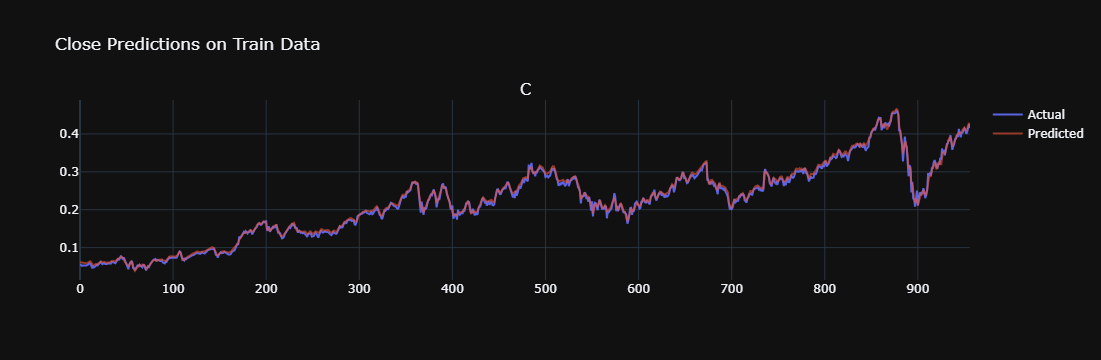

In [30]:
fig = make_subplots(rows=1, cols=1, subplot_titles=('Close Predictions'))

train_close_pred = train_predictions[:, 0]
train_close_actual = train_labels[:, 0]

fig.add_trace(go.Scatter(x=np.arange(len(train_close_actual)), y=train_close_actual, mode='lines', name='Actual', opacity=0.9))
fig.add_trace(go.Scatter(x=np.arange(len(train_close_pred)), y=train_close_pred, mode='lines', name='Predicted', opacity=0.6))

fig.update_layout(title='Close Predictions on Train Data', template='plotly_dark')
fig.show()

### <span style="color: #d62d20">Next 10 Days Predictions</span>

<span style="color: blue">1.</span> Initialize an empty list `latest_prediction` to store the model's predictions.

<span style="color: blue">2.</span> Extract the last sequence of the test data using `test_sequences[:-1]`.

<span style="color: blue">3.</span> Loop 10 times to predict the next values. In each iteration, predict the next sequence using the model and append the prediction to `latest_prediction`.

In [31]:
latest_prediction = []
last_seq = test_sequences[:-1]

for _ in range(10):
    prediction = model.predict(last_seq)
    latest_prediction.append(prediction)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


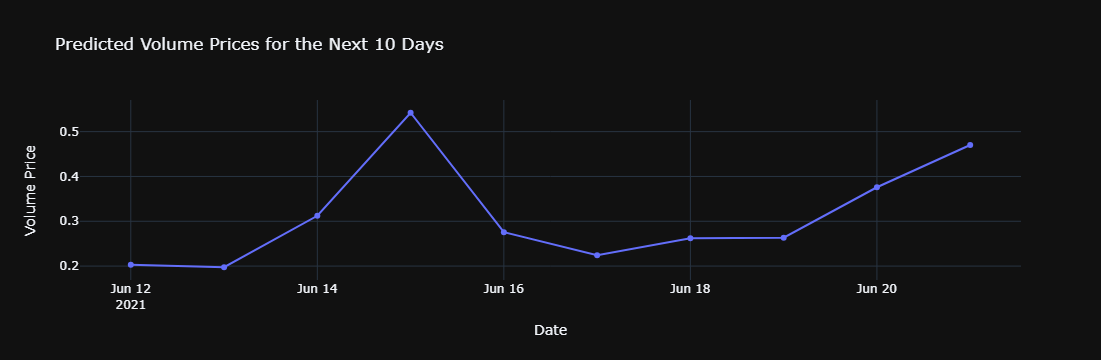

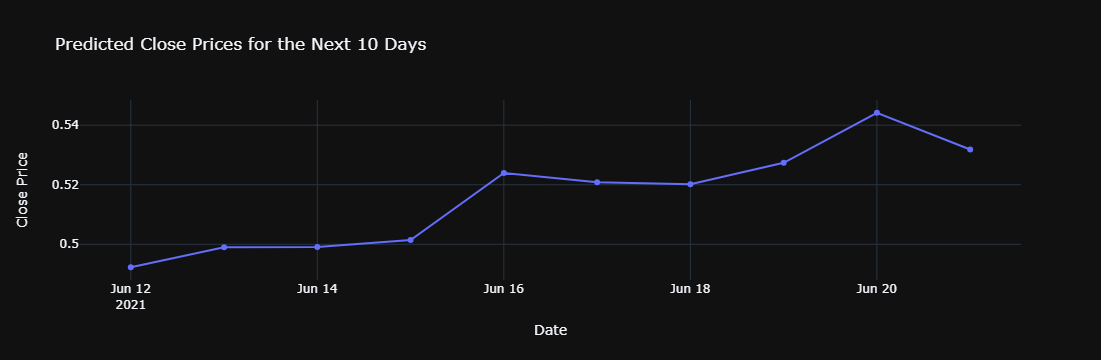

In [32]:
pi.templates.default = "plotly_dark"

predicted_data_next = np.array(latest_prediction).reshape(-1, 5)
last_date = stock['date'].max()
next_10_days = [last_date + timedelta(days=i) for i in range(1, 11)]

for i, feature_name in enumerate(['open', 'high', 'low', 'volume', 'close']):
    if feature_name in ['volume', 'close']:
        fig = go.Figure()

        fig.add_trace(go.Scatter(x=next_10_days, y=predicted_data_next[:, i],
                                 mode='lines+markers', name=f'Predicted {feature_name.capitalize()} Prices'))

        fig.update_layout(title=f'Predicted {feature_name.capitalize()} Prices for the Next 10 Days',
                          xaxis_title='Date', yaxis_title=f'{feature_name.capitalize()} Price')

        fig.show()

<div style="width: 90%; height: 100px; background-color: #ffffff; border: 3px solid #d62d20; text-align: center; line-height: 100px; color: #0057e7; font-size: 24px; font-weight: bold; border-radius:6px;">
    Thanks for paying attention ❤️
</div>